# Necessary imports, read csv and basic info

In [1]:
import pandas as pd
import numpy as np 
import json
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from datetime import datetime
import glob
import seaborn as sns
import re
import os
import io
from scipy.stats import boxcox

In [2]:
data = pd.read_csv('./US_Accidents_Dec20_updated.csv')
data

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516059,A-4239402,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.00248,-117.37936,33.99888,-117.37094,0.543,At Market St - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
1516060,A-4239403,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.76696,-117.14806,32.76555,-117.15363,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
1516061,A-4239404,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.77545,-117.84779,33.77740,-117.85727,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,False,False,False,False,False,False,Day,Day,Day,Day
1516062,A-4239405,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.99246,-118.40302,33.98311,-118.39565,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [3]:
# Number of columns
print('Total number of features', len(data.columns))

Total number of features 47


In [4]:
data.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

Dropping the below mentioned features as data regarding them is collected only after the accident has occured. Hence, these cannot be used as predictors for serious accident prediction.

In [5]:
data = data.drop(['ID','Description','Distance(mi)', 'End_Time', 
              'End_Lat', 'End_Lng'], axis=1)

In [6]:
print("Unique count of values in features:")
for feature in data.columns:
    print(feature,data[feature].unique().size)

Unique count of values in features:
Severity 4
Start_Time 1037092
Start_Lat 590611
Start_Lng 603369
Number 37593
Street 93048
Side 2
City 10658
County 1671
State 49
Zipcode 177197
Country 1
Timezone 5
Airport_Code 1986
Weather_Timestamp 331749
Temperature(F) 776
Wind_Chill(F) 884
Humidity(%) 101
Pressure(in) 1008
Visibility(mi) 75
Wind_Direction 25
Wind_Speed(mph) 122
Precipitation(in) 188
Weather_Condition 117
Amenity 2
Bump 2
Crossing 2
Give_Way 2
Junction 2
No_Exit 2
Railway 2
Roundabout 2
Station 2
Stop 2
Traffic_Calming 2
Traffic_Signal 2
Turning_Loop 1
Sunrise_Sunset 3
Civil_Twilight 3
Nautical_Twilight 3
Astronomical_Twilight 3


The output above displays the count of unique values for each of the features. From the output we notice that the features - Country and Turning_Loop have only a single value. Moreover, as these two features are categorical features having only a single class these can be dropped as well.

In [7]:
data = data.drop(['Country','Turning_Loop'], axis=1)

# Basic data preprocessing:

We have the following categorical features:
'Side', 'Timezone', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'Wind_Direction'.

We need to check the unique values in these features and clean up those values that are of the same class but have been spelled differently.

In [8]:
categorical_features = ['Severity', 'Side', 'Timezone', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit',
                        'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset',
                        'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'Wind_Direction']

for feature in categorical_features:
    print("Feature: ", feature, data[feature].unique())
    print()

Feature:  Severity [3 2 4 1]

Feature:  Side ['R' 'L']

Feature:  Timezone ['US/Eastern' 'US/Pacific' nan 'US/Central' 'US/Mountain']

Feature:  Amenity [False  True]

Feature:  Bump [False  True]

Feature:  Crossing [False  True]

Feature:  Give_Way [False  True]

Feature:  Junction [False  True]

Feature:  No_Exit [False  True]

Feature:  Railway [False  True]

Feature:  Roundabout [False  True]

Feature:  Station [False  True]

Feature:  Stop [False  True]

Feature:  Traffic_Calming [False  True]

Feature:  Traffic_Signal [False  True]

Feature:  Sunrise_Sunset ['Night' 'Day' nan]

Feature:  Civil_Twilight ['Night' 'Day' nan]

Feature:  Nautical_Twilight ['Night' 'Day' nan]

Feature:  Astronomical_Twilight ['Night' 'Day' nan]

Feature:  Wind_Direction ['SW' 'Calm' 'WSW' 'WNW' 'West' 'NNW' 'South' 'W' 'NW' 'North' 'SSE' 'SSW'
 'ESE' 'SE' nan 'East' 'Variable' 'NNE' 'NE' 'ENE' 'CALM' 'S' 'VAR' 'N'
 'E']



From the above output we see that for the feature 'Wind_Direction' there are values that belong to the same class but have been spelled differently. We clean up such values.

In [9]:
data.loc[data['Wind_Direction']=='Calm','Wind_Direction'] = 'CALM'
data.loc[(data['Wind_Direction']=='West')|(data['Wind_Direction']=='WSW')|(data['Wind_Direction']=='WNW'),'Wind_Direction'] = 'W'
data.loc[(data['Wind_Direction']=='South')|(data['Wind_Direction']=='SSW')|(data['Wind_Direction']=='SSE'),'Wind_Direction'] = 'S'
data.loc[(data['Wind_Direction']=='North')|(data['Wind_Direction']=='NNW')|(data['Wind_Direction']=='NNE'),'Wind_Direction'] = 'N'
data.loc[(data['Wind_Direction']=='East')|(data['Wind_Direction']=='ESE')|(data['Wind_Direction']=='ENE'),'Wind_Direction'] = 'E'
data.loc[data['Wind_Direction']=='Variable','Wind_Direction'] = 'VAR'
print("Unique values for Wind_Direction after cleaning up: ", data['Wind_Direction'].unique())

Unique values for Wind_Direction after cleaning up:  ['SW' 'CALM' 'W' 'N' 'S' 'NW' 'E' 'SE' nan 'VAR' 'NE']


In [10]:
data['Weather_Condition'].unique()

array(['Light Rain', 'Overcast', 'Mostly Cloudy', 'Snow', 'Light Snow',
       'Cloudy', nan, 'Scattered Clouds', 'Clear', 'Partly Cloudy',
       'Light Freezing Drizzle', 'Light Drizzle', 'Haze', 'Rain',
       'Heavy Rain', 'Fair', 'Drizzle', 'Fog', 'Thunderstorms and Rain',
       'Patches of Fog', 'Light Thunderstorms and Rain', 'Mist',
       'Rain Showers', 'Light Rain Showers', 'Heavy Drizzle', 'Smoke',
       'Light Freezing Fog', 'Light Freezing Rain', 'Blowing Snow',
       'Heavy Thunderstorms and Rain', 'Heavy Snow', 'Snow Grains',
       'Squalls', 'Light Fog', 'Shallow Fog', 'Thunderstorm',
       'Light Ice Pellets', 'Thunder', 'Thunder in the Vicinity',
       'Fair / Windy', 'Light Rain with Thunder',
       'Heavy Thunderstorms and Snow', 'Light Snow Showers',
       'Cloudy / Windy', 'Ice Pellets', 'N/A Precipitation',
       'Light Thunderstorms and Snow', 'T-Storm', 'Rain / Windy',
       'Wintry Mix', 'Partly Cloudy / Windy', 'Heavy T-Storm', 'Sand',
       'Ligh

From the output above we see that there are a large number of values for the Weather_Condition feature. Upon reading through other research (According to Road Weather Management Program) related to the analysis of car accidents in conjunction with weather conditions we came to the conclusion that the following weather conditions are of interest for our analysis as these conditions are more likely to cause an accident. These weather conditions of interest are: 'Clear', 'Cloud', 'Rain', 'Heavy_Rain', 'Snow', 'Heavy_Snow' and 'Fog'. 

In order to focus our analysis with regards to the correlation of car accidents and the corresponding weather conditions, we created separate features for the above mentioned weather conditions of interest.

Creating separate features(boolean) for: 'Clear', 'Cloud', 'Rain', 'Heavy_Rain', 'Snow', 'Heavy_Snow' and 'Fog'

In essence, for the rows where the value for the feature 'Weather_Condition' is equal to that particular weather condition of interest then it will be assigned the value true for that feature, else it is assigned the value false.

In [11]:
data['Clear'] = np.where(data['Weather_Condition'].str.contains('Clear', case=False, na = False), True, False)
data['Cloud'] = np.where(data['Weather_Condition'].str.contains('Cloud|Overcast', case=False, na = False), True, False)
data['Rain'] = np.where(data['Weather_Condition'].str.contains('Rain|storm', case=False, na = False), True, False)
data['Heavy_Rain'] = np.where(data['Weather_Condition'].str.contains('Heavy Rain|Rain Shower|Heavy T-Storm|Heavy Thunderstorms', case=False, na = False), True, False)
data['Snow'] = np.where(data['Weather_Condition'].str.contains('Snow|Sleet|Ice', case=False, na = False), True, False)
data['Heavy_Snow'] = np.where(data['Weather_Condition'].str.contains('Heavy Snow|Heavy Sleet|Heavy Ice Pellets|Snow Showers|Squalls', case=False, na = False), True, False)
data['Fog'] = np.where(data['Weather_Condition'].str.contains('Fog', case=False, na = False), True, False)

In [12]:
weather = ['Clear','Cloud','Rain','Heavy_Rain','Snow','Heavy_Snow','Fog']

First, convert timestamp data to datetime using pandas's one feature

In [13]:
data.loc[:, 'Weather_Timestamp'] = pd.to_datetime(data.loc[:, 'Weather_Timestamp'])
data.loc[:, 'Start_Time'] = pd.to_datetime(data.loc[:, 'Start_Time'])

In [14]:
# average difference between weather time and start time
print("Mean difference between 'Start_Time' and 'Weather_Timestamp': ", (data.Weather_Timestamp - data.Start_Time).mean())

Mean difference between 'Start_Time' and 'Weather_Timestamp':  0 days 00:01:29.597799165


As there is very small difference between start time and weather timestamp, we can remove one feature

In [15]:
data = data.drop(["Weather_Timestamp"], axis=1)

In [16]:

data['Year'] = data['Start_Time'].dt.year

nmonth = data['Start_Time'].dt.month
data['Month'] = nmonth

data['Weekday']= data['Start_Time'].dt.weekday

#days_each_month = np.cumsum(np.array([0,31,28,31,30,31,30,31,31,30,31,30,31]))
#nday = [days_each_month[arg-1] for arg in nmonth.values]
#nday = nday + data["Start_Time"].dt.day.values
#data['Day'] = nday + data["Start_Time"].dt.day.values

data['Day'] = data["Start_Time"].dt.day.values

data['Hour'] = data['Start_Time'].dt.hour

#data['Minute'] = data['Hour']*60.0 + df["Start_Time"].dt.minute
data['Minute'] = data["Start_Time"].dt.minute
data.loc[:4,['Start_Time', 'Year', 'Month', 'Weekday', 'Day', 'Hour', 'Minute']]

,Start_Time,Year,Month,Weekday,Day,Hour,Minute
0,2016-02-08 00:37:08,2016,2,0,8,0,37
1,2016-02-08 05:56:20,2016,2,0,8,5,56
2,2016-02-08 06:15:39,2016,2,0,8,6,15
3,2016-02-08 06:15:39,2016,2,0,8,6,15
4,2016-02-08 06:51:45,2016,2,0,8,6,51


# Calculate and handle missing values for the features

In [17]:
missing = pd.DataFrame(data.isnull().sum()).reset_index()
missing.columns = ['Feature', 'Missing_Percent(%)']
missing['Missing_Percent(%)'] = missing['Missing_Percent(%)'].apply(lambda x: x / data.shape[0] * 100)
missing.loc[:,:]

,Feature,Missing_Percent(%)
0,Severity,0.000000
1,Start_Time,0.000000
2,Start_Lat,0.000000
3,Start_Lng,0.000000
4,Number,69.000715
5,Street,0.000000
6,Side,0.000000
7,City,0.005475
8,County,0.000000
9,State,0.000000


The percentage of missing values for the feature 'Number' is more than 60%. Moreover, as the feature 'Number' corresponds to the street number of the accident site, it is not highly related to the severity of the accidents hence, we drop this feature.

In [18]:
data = data.drop(['Number'], axis=1)

The count of missing values for the features: 'City', 'Zipcode', 'Timezone', 'Airport_Code', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight','Astronomical_Twilight' is negligible as compared to the sample size. Hence, it makes sense to drop such rows that have missing values for these features.

In [19]:
data = data.dropna(subset=['City','Zipcode','Airport_Code', 'Timezone', 'Sunrise_Sunset','Civil_Twilight','Nautical_Twilight',
                           'Astronomical_Twilight'])

In [20]:
data = data.dropna(subset = ['Wind_Chill(F)', 'Precipitation(in)'])
data

,Severity,Start_Time,Start_Lat,Start_Lng,Street,Side,City,County,State,Zipcode,...,Heavy_Rain,Snow,Heavy_Snow,Fog,Year,Month,Weekday,Day,Hour,Minute
0,3,2016-02-08 00:37:08,40.108910,-83.092860,Outerbelt E,R,Dublin,Franklin,OH,43017,...,False,False,False,False,2016,2,0,8,0,37
5,3,2016-02-08 07:53:43,39.172393,-84.492792,I-75 S,R,Cincinnati,Hamilton,OH,45217,...,False,False,False,False,2016,2,0,8,7,53
9,2,2016-02-08 11:51:46,41.375310,-81.820170,I-71 S,R,Cleveland,Cuyahoga,OH,44130,...,False,True,False,False,2016,2,0,8,11,51
11,2,2016-02-08 15:16:43,40.109310,-82.968490,Outerbelt W,R,Westerville,Franklin,OH,43081,...,False,True,False,False,2016,2,0,8,15,16
12,2,2016-02-08 15:43:50,39.192880,-84.477230,I-75 N,R,Cincinnati,Hamilton,OH,45216,...,False,True,False,False,2016,2,0,8,15,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516059,2,2019-08-23 18:03:25,34.002480,-117.379360,Pomona Fwy E,R,Riverside,Riverside,CA,92501,...,False,False,False,False,2019,8,4,23,18,3
1516060,2,2019-08-23 19:11:30,32.766960,-117.148060,I-8 W,R,San Diego,San Diego,CA,92108,...,False,False,False,False,2019,8,4,23,19,11
1516061,2,2019-08-23 19:00:21,33.775450,-117.847790,Garden Grove Fwy,R,Orange,Orange,CA,92866,...,False,False,False,False,2019,8,4,23,19,0
1516062,2,2019-08-23 19:00:21,33.992460,-118.403020,San Diego Fwy S,R,Culver City,Los Angeles,CA,90230,...,False,False,False,False,2019,8,4,23,19,0


In [21]:
missing = pd.DataFrame(data.isnull().sum()).reset_index()
missing.columns = ['Feature', 'Missing_Percent(%)']
missing['Missing_Percent(%)'] = missing['Missing_Percent(%)'].apply(lambda x: x / data.shape[0] * 100)
missing.loc[missing['Missing_Percent(%)']>0,:]

,Feature,Missing_Percent(%)
14,Humidity(%),0.201091
15,Pressure(in),0.070967
16,Visibility(mi),0.259088
17,Wind_Direction,0.001160
20,Weather_Condition,0.218595


In [22]:
Weather_data=['Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)']
print("The number of remaining missing values: ")
for i in Weather_data:
    data[i] = data.groupby(['Airport_Code','Month'])[i].apply(lambda x: x.fillna(x.median()))
    print( i + " : " + data[i].isnull().sum().astype(str))

The number of remaining missing values: 


C:\Users\Dell\anaconda3\envs\usa-accidents-severity-predictions\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\Dell\anaconda3\envs\usa-accidents-severity-predictions\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\Dell\anaconda3\envs\usa-accidents-severity-predictions\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\Dell\anaconda3\envs\usa-accidents-severity-predictions\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\Dell\anaconda3\envs\usa-accidents-severity-predictions\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a,

Humidity(%) : 20


C:\Users\Dell\anaconda3\envs\usa-accidents-severity-predictions\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\Dell\anaconda3\envs\usa-accidents-severity-predictions\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\Dell\anaconda3\envs\usa-accidents-severity-predictions\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\Dell\anaconda3\envs\usa-accidents-severity-predictions\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


Pressure(in) : 5


C:\Users\Dell\anaconda3\envs\usa-accidents-severity-predictions\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\Dell\anaconda3\envs\usa-accidents-severity-predictions\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\Dell\anaconda3\envs\usa-accidents-severity-predictions\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\Dell\anaconda3\envs\usa-accidents-severity-predictions\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\Dell\anaconda3\envs\usa-accidents-severity-predictions\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a,

C:\Users\Dell\anaconda3\envs\usa-accidents-severity-predictions\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\Dell\anaconda3\envs\usa-accidents-severity-predictions\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\Dell\anaconda3\envs\usa-accidents-severity-predictions\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\Dell\anaconda3\envs\usa-accidents-severity-predictions\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\Dell\anaconda3\envs\usa-accidents-severity-predictions\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a,

Visibility(mi) : 244
Wind_Speed(mph) : 0


In [23]:
data = data.dropna(subset=Weather_data)

In [24]:
# group data by 'Airport_Code' and 'Start_Month' then fill NAs with majority value
from collections import Counter
weather_cat = ['Wind_Direction'] + weather
print("Count of missing values that will be dropped: ")
for i in weather_cat:
    
    data[i] = data.groupby(['Airport_Code','Month'])[i].apply(lambda x: x.fillna(Counter(x).most_common()[0][0]) if all(x.isnull())==False else x)
    print(i + " : " + data[i].isnull().sum().astype(str))

Count of missing values that will be dropped: 


C:\Users\Dell\AppData\Local\Temp/ipykernel_2704/2214257782.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = data.groupby(['Airport_Code','Month'])[i].apply(lambda x: x.fillna(Counter(x).most_common()[0][0]) if all(x.isnull())==False else x)


Wind_Direction : 0
Clear : 0
Cloud : 0
Rain : 0
Heavy_Rain : 0
Snow : 0
Heavy_Snow : 0
Fog : 0


In [25]:
data = data.dropna(subset=weather_cat)

# Data Exploration

In [26]:
data.Severity.value_counts()

2    808545
3     68206
4     45691
1     25620
Name: Severity, dtype: int64

In [27]:
# Remove accidents with severity=1
data = data[data.Severity != 1]

## Undersampling

In [28]:
num_sample_for_each_class = data.Severity.value_counts().min()
balanced_data = pd.concat([data[data['Severity']==2].sample(num_sample_for_each_class),
                           data[data['Severity']==3].sample(num_sample_for_each_class),
                           data[data['Severity']==4].sample(num_sample_for_each_class)], axis=0)
balanced_data

,Severity,Start_Time,Start_Lat,Start_Lng,Street,Side,City,County,State,Zipcode,...,Heavy_Rain,Snow,Heavy_Snow,Fog,Year,Month,Weekday,Day,Hour,Minute
716423,2,2020-12-13 22:31:19,27.605242,-80.509425,I-95 S,R,Vero Beach,Indian River,FL,32968,...,False,False,False,False,2020,12,6,13,22,31
886387,2,2020-03-30 14:24:00,38.569037,-121.469864,29th St,L,Sacramento,Sacramento,CA,95816,...,False,False,False,False,2020,3,0,30,14,24
328827,2,2020-11-03 13:54:30,27.714916,-82.335274,S US Highway 301,L,Wimauma,Hillsborough,FL,33598,...,False,False,False,False,2020,11,1,3,13,54
881219,2,2020-03-27 22:20:12,28.191690,-82.466080,State Road 54,R,Lutz,Pasco,FL,33558,...,False,False,False,False,2020,3,4,27,22,20
1193074,2,2019-02-25 06:15:59,43.913827,-123.013040,I-5 S,R,Creswell,Lane,OR,97426,...,False,True,False,False,2019,2,0,25,6,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874502,4,2020-03-24 06:10:53,26.029260,-80.377280,Sheridan St,R,Pembroke Pines,Broward,FL,33028,...,False,False,False,False,2020,3,1,24,6,10
1513358,4,2019-08-18 21:46:40,40.014651,-105.128451,Arapahoe Rd,L,Lafayette,Boulder,CO,80026,...,False,False,False,False,2019,8,6,18,21,46
1046152,4,2019-12-09 09:57:08,39.972410,-104.751410,E 152nd Ave,R,Brighton,Adams,CO,80603,...,False,False,False,False,2019,12,0,9,9,57
1079986,4,2019-10-14 21:00:00,41.240480,-96.086070,I-680 S,R,Omaha,Douglas,NE,68144,...,False,False,False,False,2019,10,0,14,21,0


In [29]:
def count_plot(df: pd.DataFrame, x, hue, title: str, figsize=None):
    plt.figure(figsize=figsize)
    sns.countplot(x=x, hue=hue, data=df)
    plt.title(title, size=15, y=1.05)
    plt.show()

## Time features

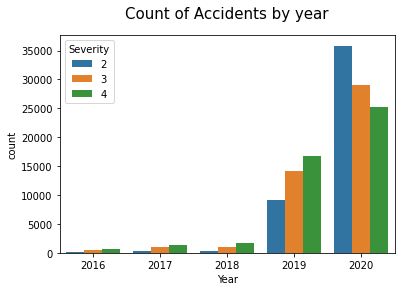

In [86]:
count_plot(balanced_data, 'Year', 'Severity', 'Count of Accidents by year')

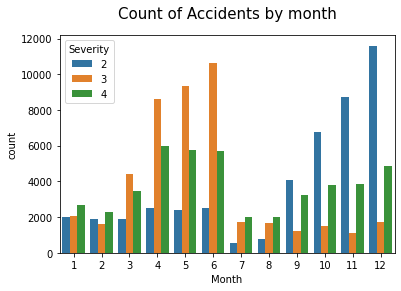

In [87]:
count_plot(balanced_data, 'Month', 'Severity', 'Count of Accidents by month')

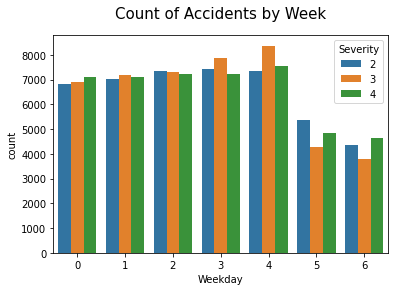

In [88]:
count_plot(balanced_data, 'Weekday', 'Severity', 'Count of Accidents by Week')

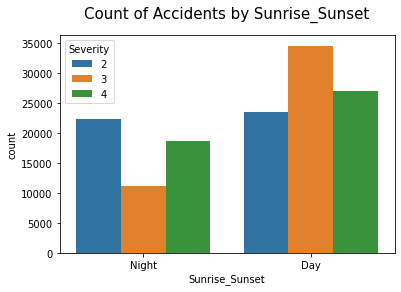

In [90]:
count_plot(balanced_data, 'Sunrise_Sunset', 'Severity', 'Count of Accidents by Sunrise_Sunset')

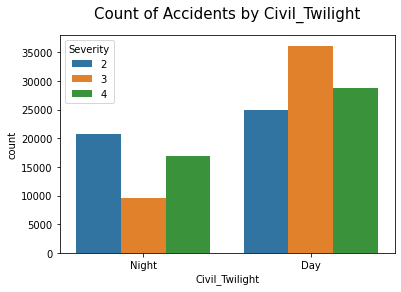

In [92]:
count_plot(balanced_data, 'Civil_Twilight', 'Severity', 'Count of Accidents by Civil_Twilight')

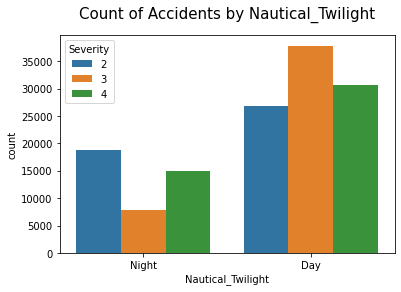

In [93]:
count_plot(balanced_data, 'Nautical_Twilight', 'Severity', 'Count of Accidents by Nautical_Twilight')

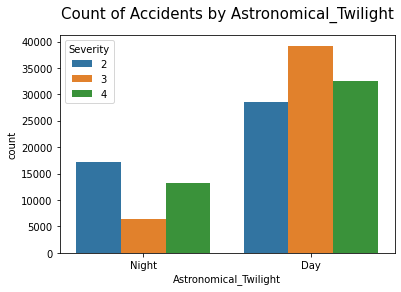

In [94]:
count_plot(balanced_data, 'Astronomical_Twilight', 'Severity', 'Count of Accidents by Astronomical_Twilight')

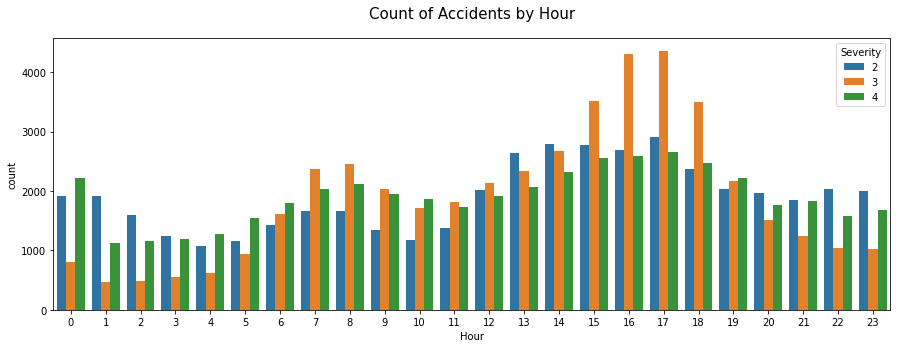

In [97]:
count_plot(balanced_data, 'Hour', 'Severity', 'Count of Accidents by Hour', figsize=(15,5))

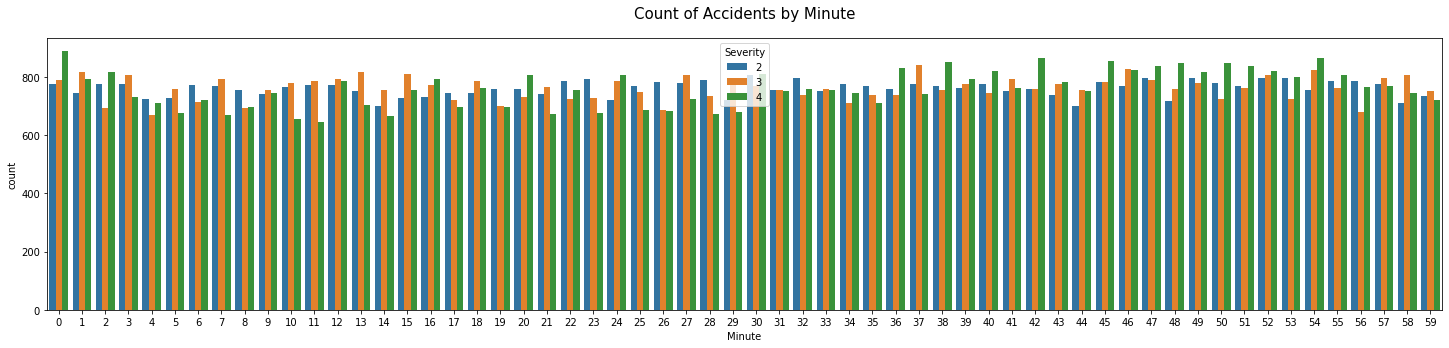

In [101]:
count_plot(balanced_data, 'Minute', 'Severity', 'Count of Accidents by Minute', figsize=(25,5))

## Address Features

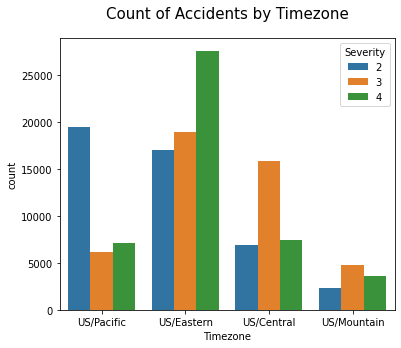

In [99]:
count_plot(balanced_data, 'Timezone', 'Severity', 'Count of Accidents by Timezone', figsize=(6, 5))

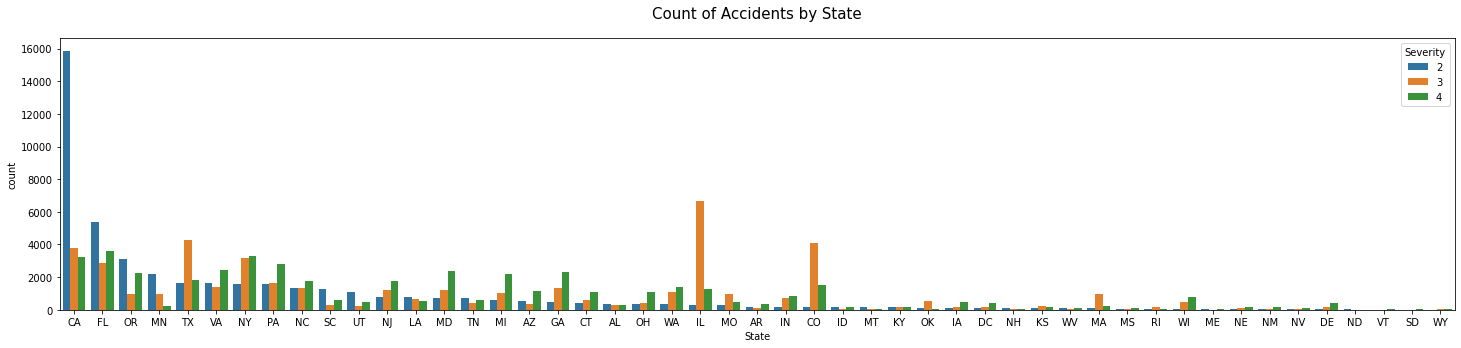

In [103]:
plt.figure(figsize=(25,5))
sns.countplot(x='State', hue='Severity', data=balanced_data, 
              order=balanced_data[balanced_data['Severity']==2]['State'].value_counts().index)
plt.title('Count of Accidents by State', size=15, y=1.05)
plt.show()

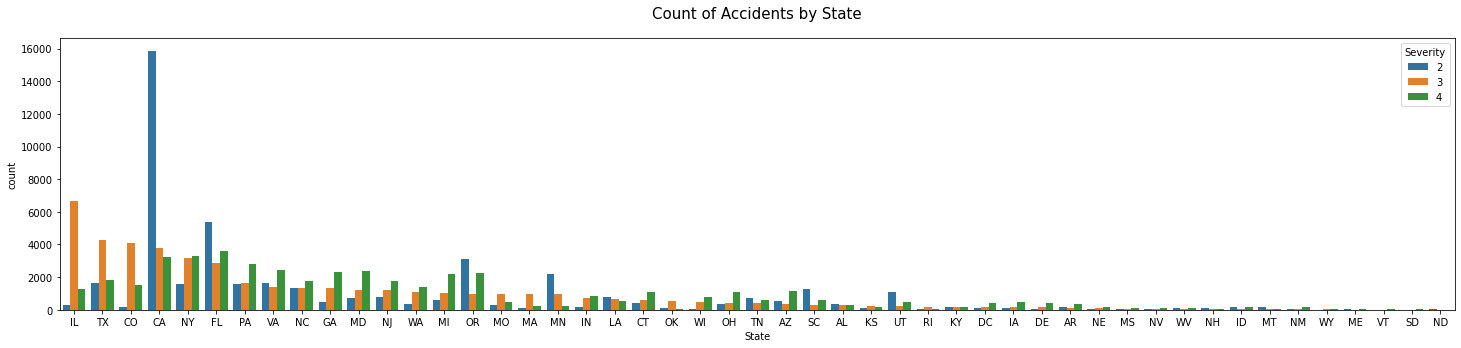

In [104]:
plt.figure(figsize=(25,5))
sns.countplot(x='State', hue='Severity', data=balanced_data, 
              order=balanced_data[balanced_data['Severity']==3]['State'].value_counts().index)
plt.title('Count of Accidents by State', size=15, y=1.05)
plt.show()

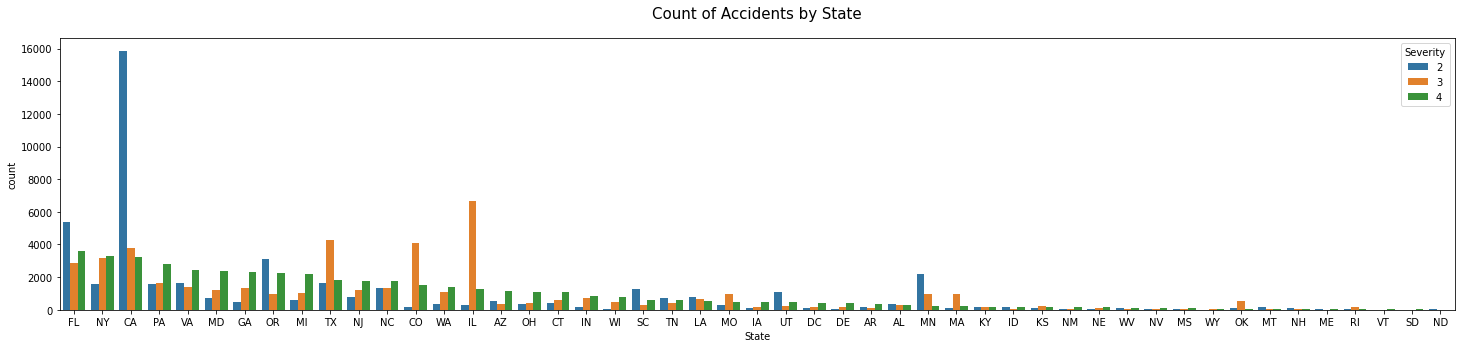

In [105]:
plt.figure(figsize=(25,5))
sns.countplot(x='State', hue='Severity', data=balanced_data, 
              order=balanced_data[balanced_data['Severity']==4]['State'].value_counts().index)
plt.title('Count of Accidents by State', size=15, y=1.05)
plt.show()

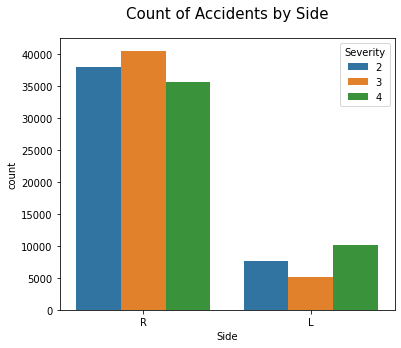

In [106]:
count_plot(balanced_data, 'Side', 'Severity', 'Count of Accidents by Side', figsize=(6, 5))

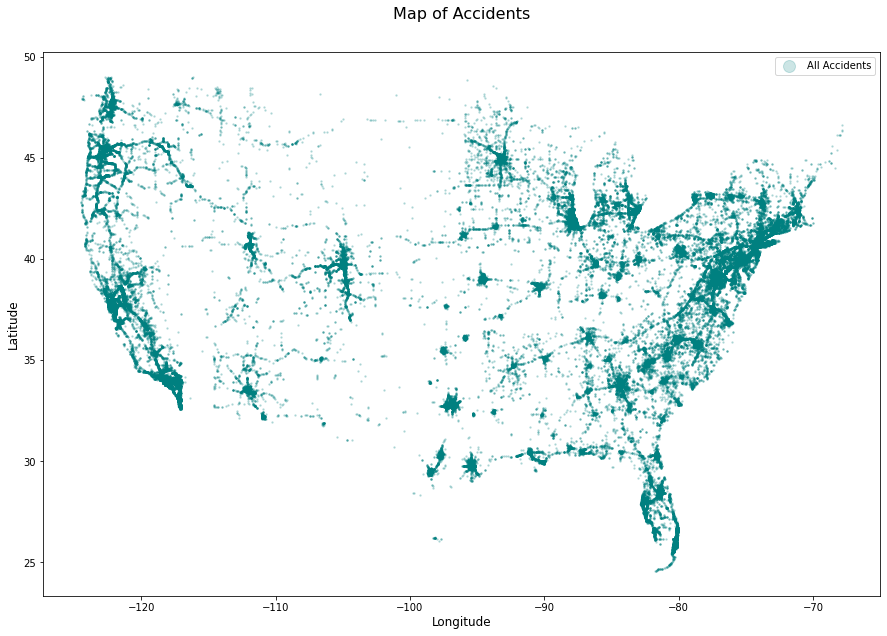

In [107]:
#df_4 = df[df['Severity4']==1]

plt.figure(figsize=(15,10))

plt.plot('Start_Lng', 'Start_Lat', data=balanced_data, linestyle='', marker='o', markersize=1.5, color="teal", alpha=0.2,
         label='All Accidents')
#plt.plot( 'Start_Lng', 'Start_Lat', data=df_4, linestyle='', marker='o', markersize=3, color="coral", alpha=0.5, label='Accidents with Serverity Level 4')
plt.legend(markerscale=8)
plt.xlabel('Longitude', size=12, labelpad=3)
plt.ylabel('Latitude', size=12, labelpad=3)
plt.title('Map of Accidents', size=16, y=1.05)
plt.show()

In [108]:
balanced_data.columns

Index(['Severity', 'Start_Time', 'Start_Lat', 'Start_Lng', 'Street', 'Side',
       'City', 'County', 'State', 'Zipcode', 'Timezone', 'Airport_Code',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'Clear',
       'Cloud', 'Rain', 'Heavy_Rain', 'Snow', 'Heavy_Snow', 'Fog', 'Year',
       'Month', 'Weekday', 'Day', 'Hour', 'Minute'],
      dtype='object')

In [110]:
# Frequency of each unique cities
balanced_data['City'].value_counts()

Miami             2647
Chicago           2615
Los Angeles       2229
Dallas            2071
Denver            1904
                  ... 
Canal Point          1
New Virginia         1
Heth                 1
Swifton              1
Meadows of Dan       1
Name: City, Length: 7012, dtype: int64

In [113]:
# Frequency of each unique zipcode
balanced_data['Zipcode'].value_counts()

80216         400
80229         304
60616         285
97019         248
91761         223
             ... 
93263-9755      1
23221-1705      1
78756-3717      1
33036-3631      1
33009-2017      1
Name: Zipcode, Length: 36155, dtype: int64

In [115]:
# Frequency of each unique zipcode
balanced_data['Airport_Code'].value_counts()

KMDW    2973
KCQT    1740
KBJC    1712
KLGA    1504
KORD    1388
        ... 
KGGG       1
K0J4       1
KRKR       1
K7L2       1
KRDK       1
Name: Airport_Code, Length: 1645, dtype: int64

## Weather features

In [166]:
def plot_histogram(df: pd.DataFrame, feature: str):
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].hist(df[df['Severity'] == 2].loc[:, feature], bins=100)
    axs[0].set_title('Severity = 2')
    axs[1].hist(df[df['Severity'] == 3].loc[:, feature], bins=100)
    axs[1].set_title('Severity = 3')
    axs[2].hist(df[df['Severity'] == 4].loc[:, feature], bins=100)
    axs[2].set_title('Severity = 4')
    fig.suptitle('Histogram - ' + feature)
    fig.tight_layout()
    plt.show()

### Continuous Weather features

In [167]:
continuous_weather_feature = ['Temperature(F)', 'Humidity(%)', 'Wind_Chill(F)', 'Pressure(in)', 'Visibility(mi)',
                              'Wind_Speed(mph)', 'Precipitation(in)']

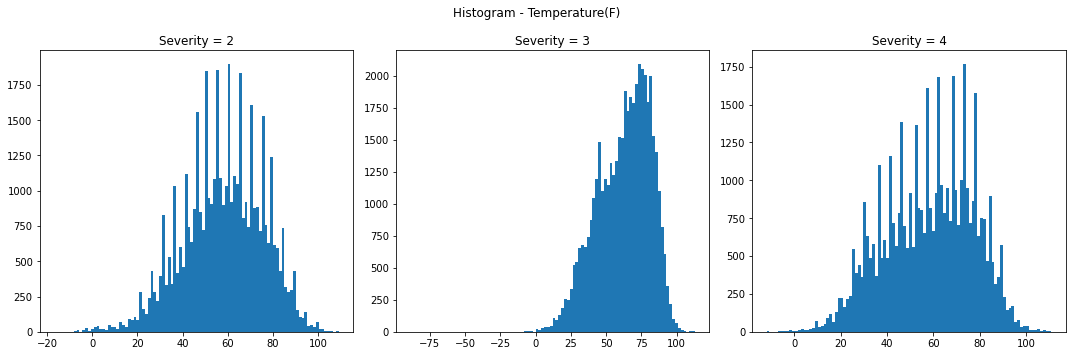

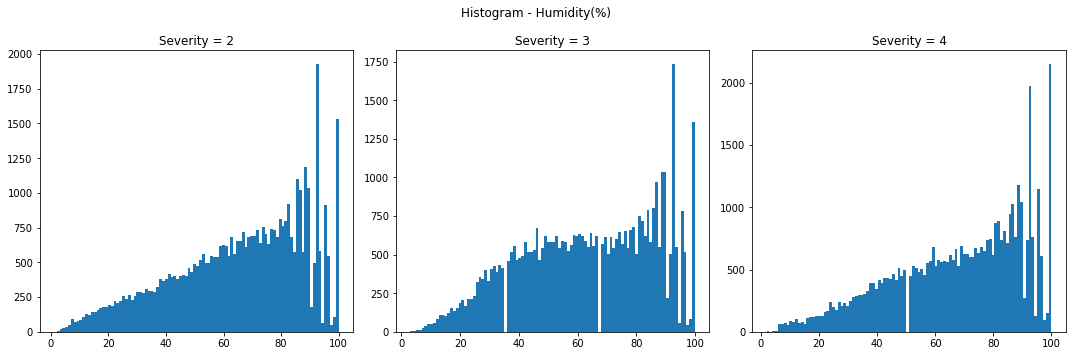

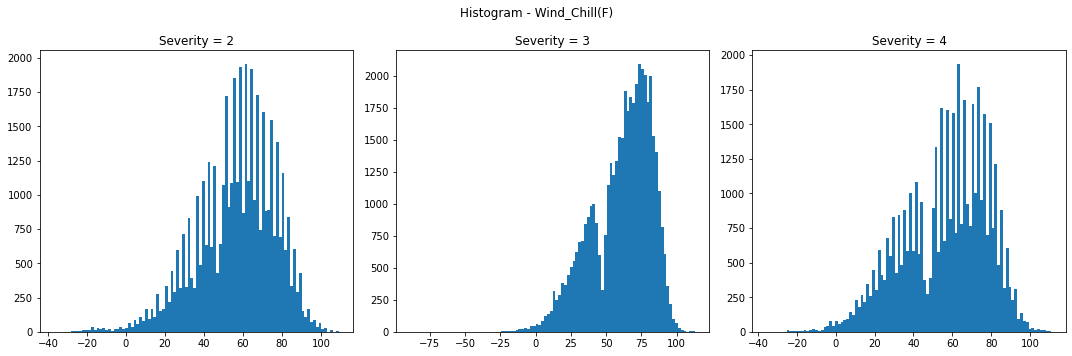

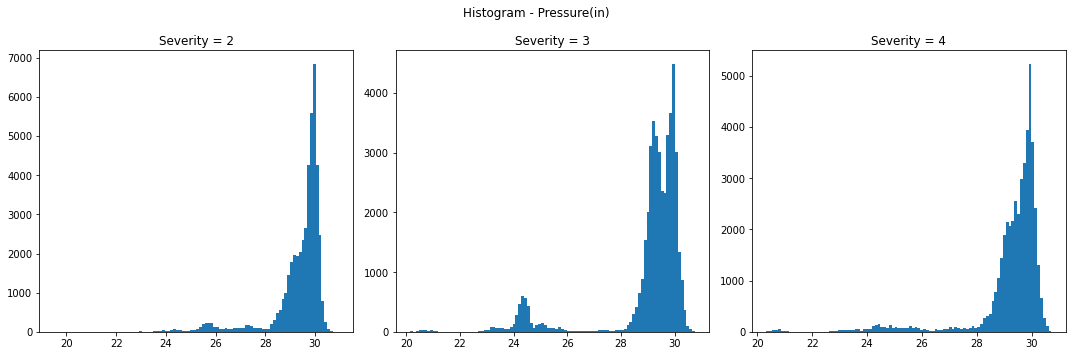

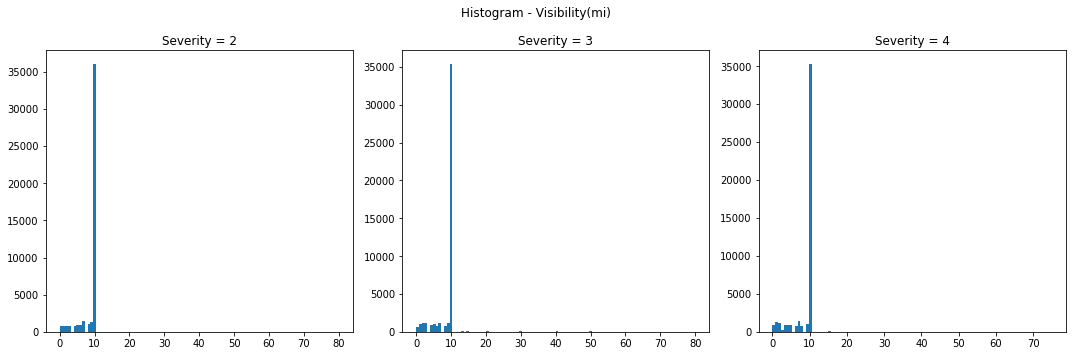

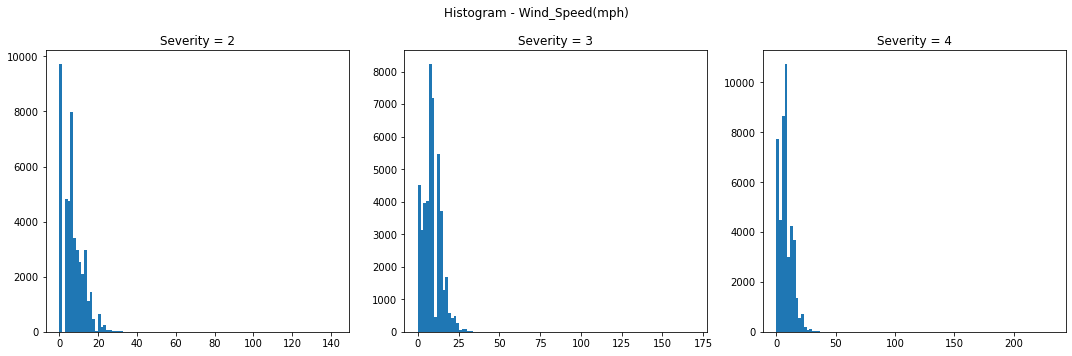

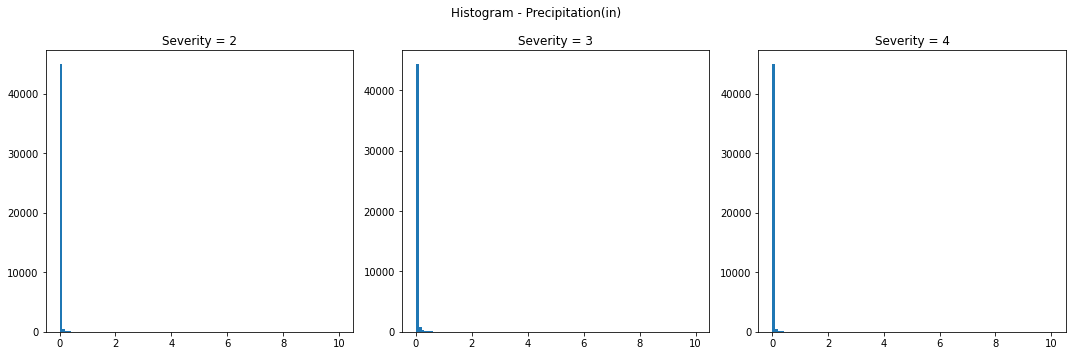

In [168]:
for feature in continuous_weather_feature:
    plot_histogram(balanced_data, feature)

In [152]:
balanced_data.columns

Index(['Severity', 'Start_Time', 'Start_Lat', 'Start_Lng', 'Street', 'Side',
       'City', 'County', 'State', 'Zipcode', 'Timezone', 'Airport_Code',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'Clear',
       'Cloud', 'Rain', 'Heavy_Rain', 'Snow', 'Heavy_Snow', 'Fog', 'Year',
       'Month', 'Weekday', 'Day', 'Hour', 'Minute'],
      dtype='object')

### Discrete Binary Weather features

In [169]:
discrete_binary_weather_features = ['Clear', 'Cloud', 'Rain', 'Heavy_Rain', 'Snow', 'Heavy_Snow', 'Fog']

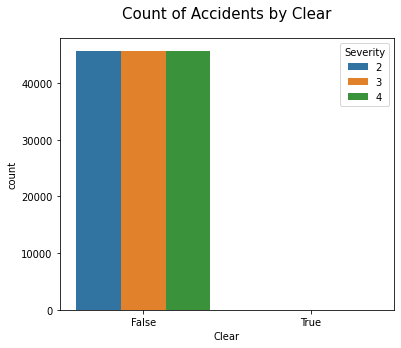

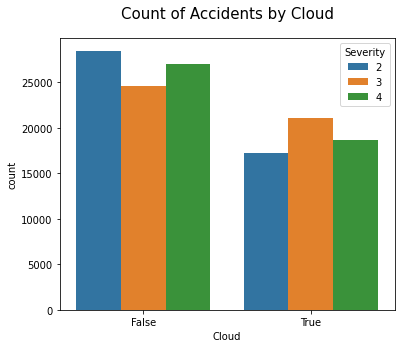

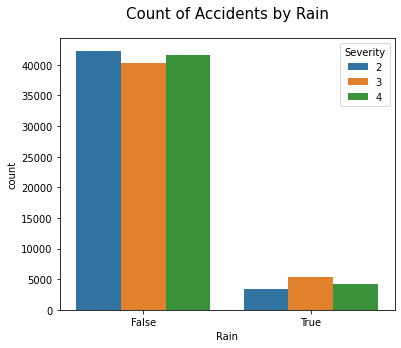

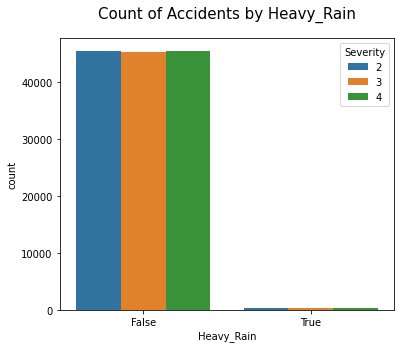

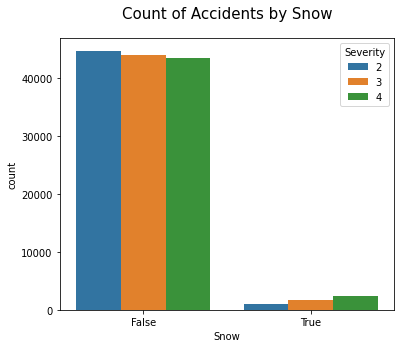

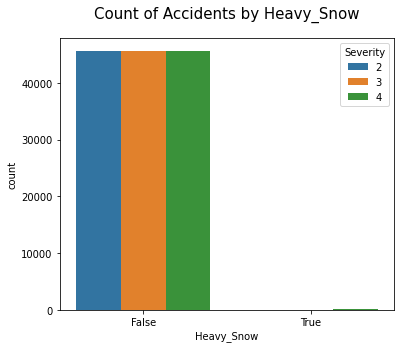

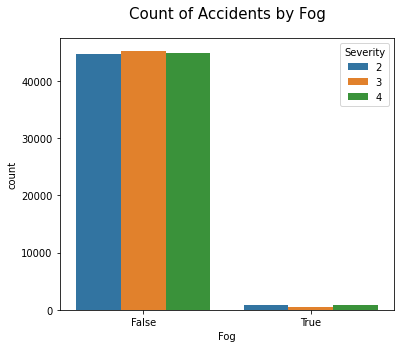

In [170]:
for feature in discrete_binary_weather_features:
    count_plot(balanced_data, feature, 'Severity', 'Count of Accidents by ' + feature, figsize=(6, 5))

### Wind direction

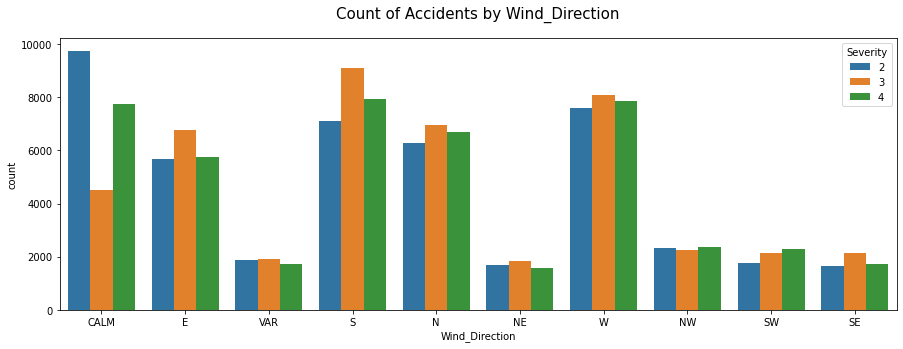

In [160]:
count_plot(balanced_data, 'Wind_Direction', 'Severity', 'Count of Accidents by Wind_Direction', figsize=(15, 5))

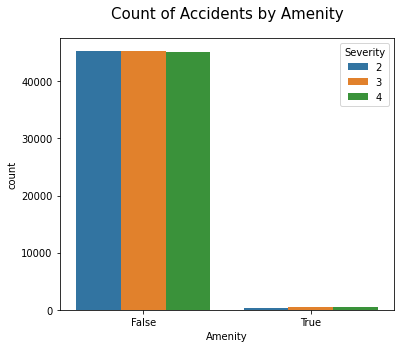

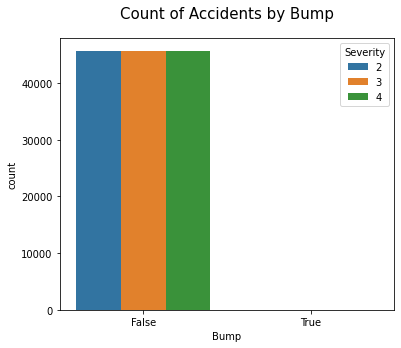

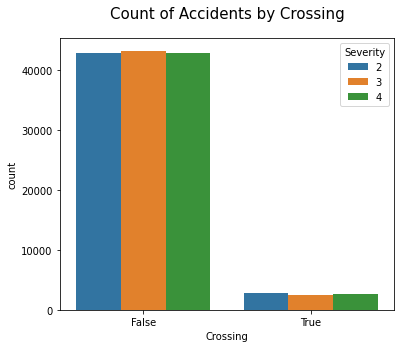

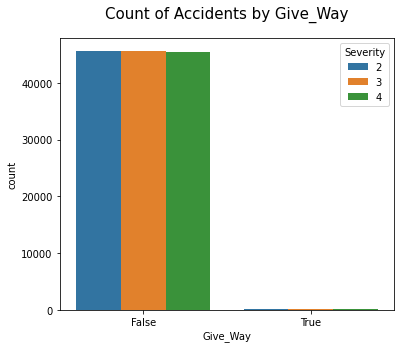

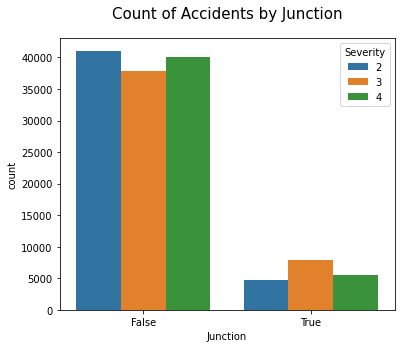

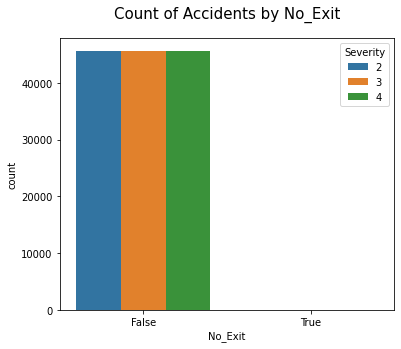

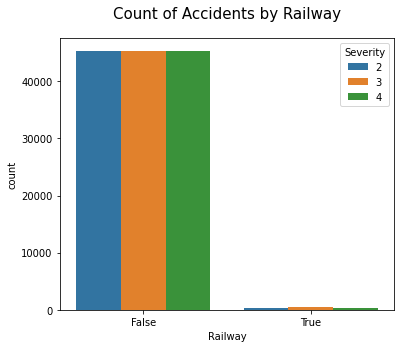

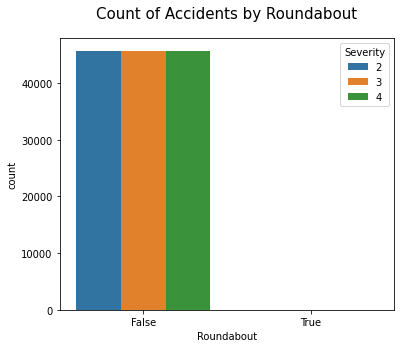

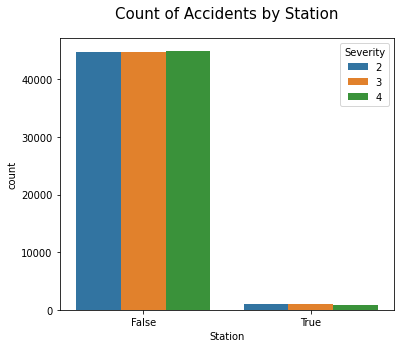

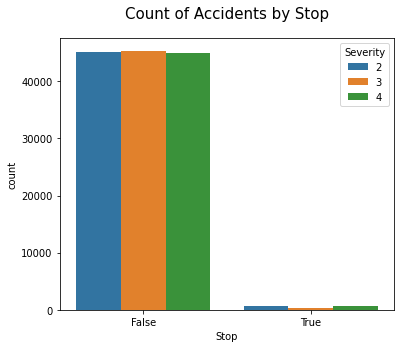

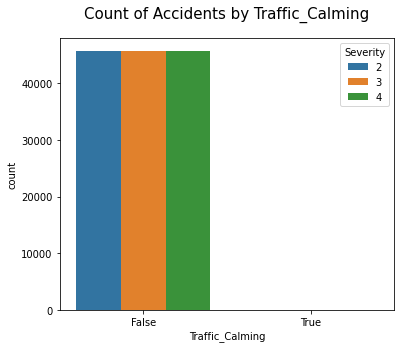

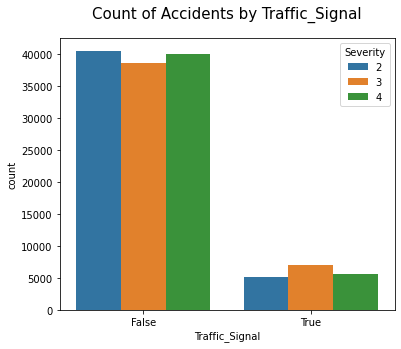

In [162]:
POI_features = ['Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway','Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal']
for feature in POI_features:
    count_plot(balanced_data, feature, 'Severity', 'Count of Accidents by ' + feature, figsize=(6, 5))

## Correlation Analysis

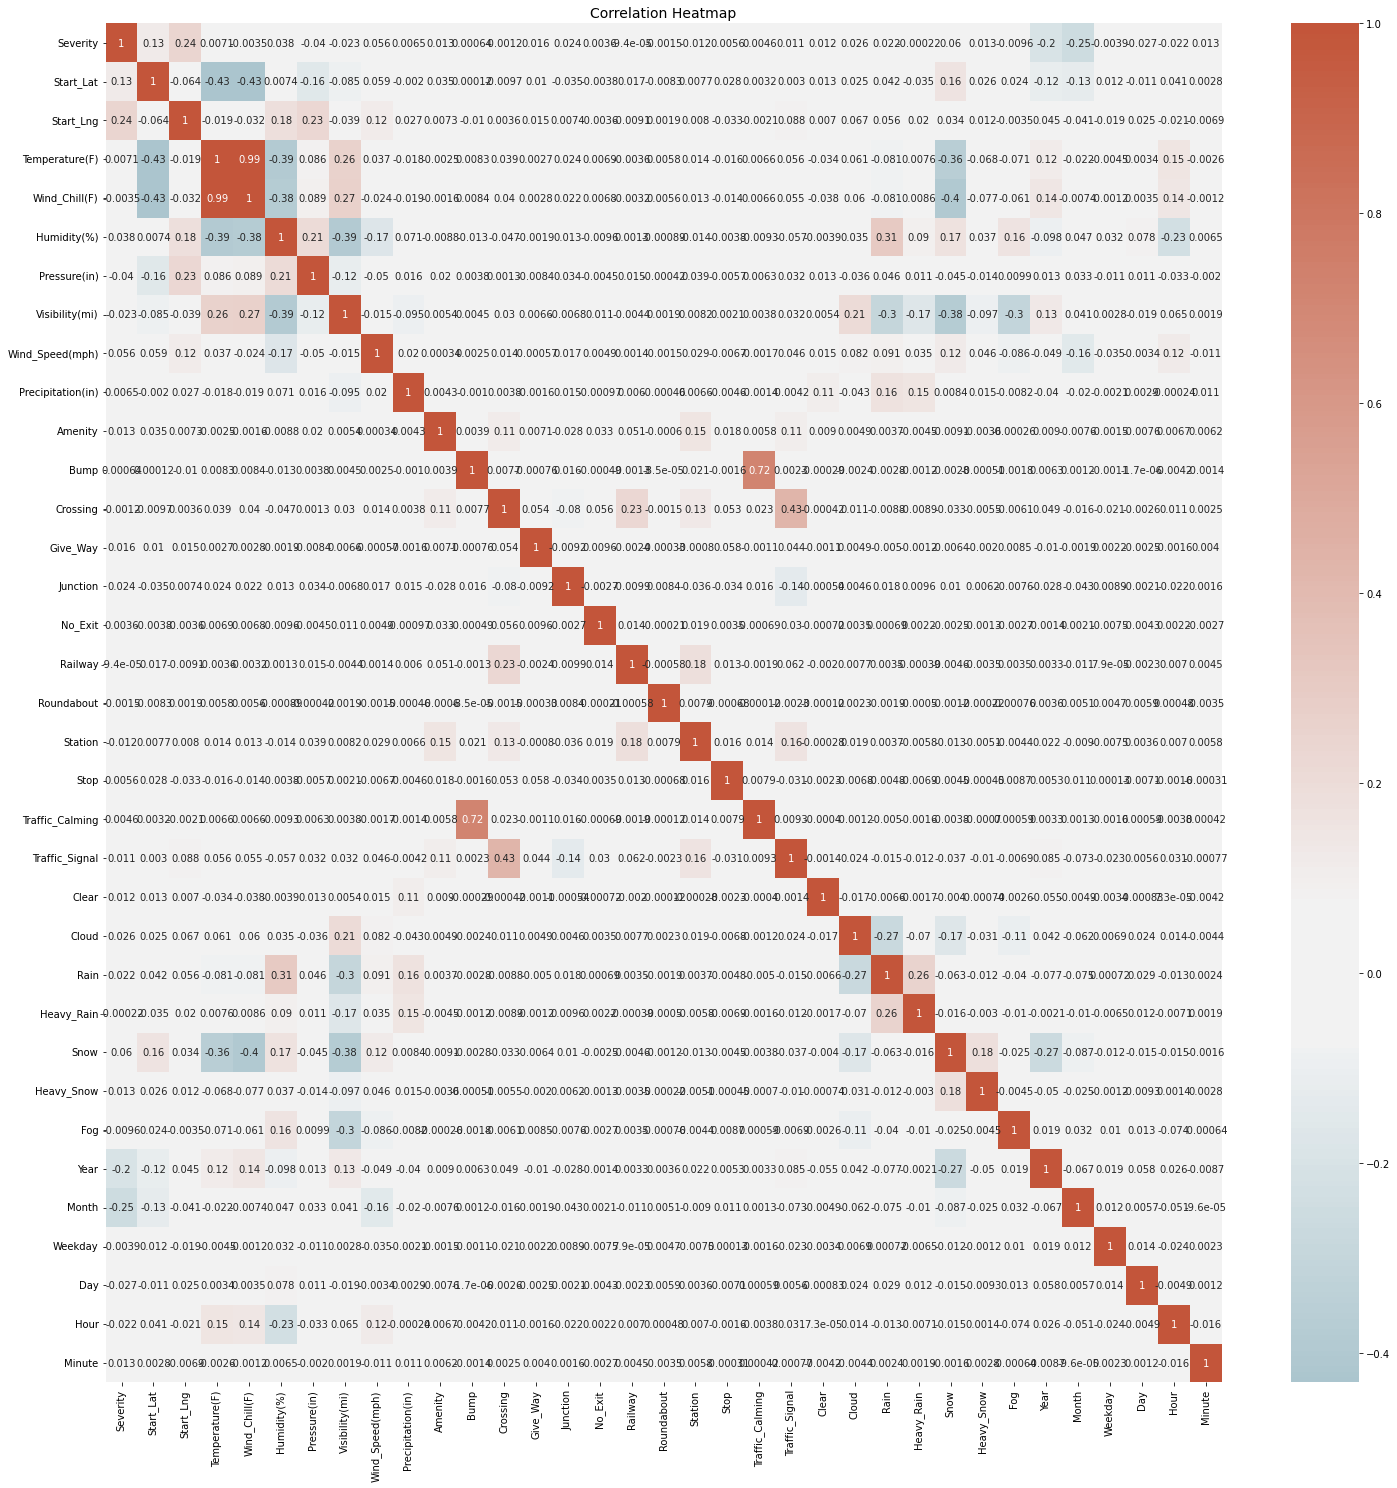

In [173]:
plt.figure(figsize=(25,25))
cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
sns.heatmap(balanced_data.corr(), annot=True,cmap=cmap, center=0).set_title("Correlation Heatmap", fontsize=14)
plt.show()

In [30]:
for col in balanced_data.columns:
    print(col, balanced_data[col].nunique(), balanced_data[col].dtypes)

Severity 3 int64
Start_Time 116834 datetime64[ns]
Start_Lat 95110 float64
Start_Lng 95853 float64
Street 27751 object
Side 2 object
City 7056 object
County 1358 object
State 49 object
Zipcode 36164 object
Timezone 4 object
Airport_Code 1648 object
Temperature(F) 263 float64
Wind_Chill(F) 629 float64
Humidity(%) 109 float64
Pressure(in) 924 float64
Visibility(mi) 46 float64
Wind_Direction 10 object
Wind_Speed(mph) 80 float64
Precipitation(in) 114 float64
Weather_Condition 85 object
Amenity 2 bool
Bump 2 bool
Crossing 2 bool
Give_Way 2 bool
Junction 2 bool
No_Exit 2 bool
Railway 2 bool
Roundabout 2 bool
Station 2 bool
Stop 2 bool
Traffic_Calming 2 bool
Traffic_Signal 2 bool
Sunrise_Sunset 2 object
Civil_Twilight 2 object
Nautical_Twilight 2 object
Astronomical_Twilight 2 object
Clear 2 bool
Cloud 2 bool
Rain 2 bool
Heavy_Rain 2 bool
Snow 2 bool
Heavy_Snow 2 bool
Fog 2 bool
Year 5 int64
Month 12 int64
Weekday 7 int64
Day 31 int64
Hour 24 int64
Minute 60 int64


In [31]:
balanced_data = balanced_data.drop('Start_Time', axis=1)

In [32]:
for col in balanced_data.columns:
    print(col, balanced_data[col].nunique(), balanced_data[col].dtypes)

Severity 3 int64
Start_Lat 95110 float64
Start_Lng 95853 float64
Street 27751 object
Side 2 object
City 7056 object
County 1358 object
State 49 object
Zipcode 36164 object
Timezone 4 object
Airport_Code 1648 object
Temperature(F) 263 float64
Wind_Chill(F) 629 float64
Humidity(%) 109 float64
Pressure(in) 924 float64
Visibility(mi) 46 float64
Wind_Direction 10 object
Wind_Speed(mph) 80 float64
Precipitation(in) 114 float64
Weather_Condition 85 object
Amenity 2 bool
Bump 2 bool
Crossing 2 bool
Give_Way 2 bool
Junction 2 bool
No_Exit 2 bool
Railway 2 bool
Roundabout 2 bool
Station 2 bool
Stop 2 bool
Traffic_Calming 2 bool
Traffic_Signal 2 bool
Sunrise_Sunset 2 object
Civil_Twilight 2 object
Nautical_Twilight 2 object
Astronomical_Twilight 2 object
Clear 2 bool
Cloud 2 bool
Rain 2 bool
Heavy_Rain 2 bool
Snow 2 bool
Heavy_Snow 2 bool
Fog 2 bool
Year 5 int64
Month 12 int64
Weekday 7 int64
Day 31 int64
Hour 24 int64
Minute 60 int64


In [33]:
balanced_data = balanced_data.drop(['Street', 'City', 'County', 'State', 'Zipcode', 'Airport_Code', 'Wind_Direction',
                                    'Weather_Condition'], axis=1)
balanced_data

,Severity,Start_Lat,Start_Lng,Side,Timezone,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),...,Heavy_Rain,Snow,Heavy_Snow,Fog,Year,Month,Weekday,Day,Hour,Minute
716423,2,27.605242,-80.509425,R,US/Eastern,68.0,68.0,93.0,30.04,10.0,...,False,False,False,False,2020,12,6,13,22,31
886387,2,38.569037,-121.469864,L,US/Pacific,64.0,64.0,52.0,30.25,10.0,...,False,False,False,False,2020,3,0,30,14,24
328827,2,27.714916,-82.335274,L,US/Eastern,78.0,78.0,36.0,30.16,10.0,...,False,False,False,False,2020,11,1,3,13,54
881219,2,28.191690,-82.466080,R,US/Eastern,77.0,77.0,69.0,30.01,10.0,...,False,False,False,False,2020,3,4,27,22,20
1193074,2,43.913827,-123.013040,R,US/Pacific,33.1,24.4,92.0,29.65,0.8,...,False,True,False,False,2019,2,0,25,6,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874502,4,26.029260,-80.377280,R,US/Eastern,72.0,72.0,81.0,30.13,10.0,...,False,False,False,False,2020,3,1,24,6,10
1513358,4,40.014651,-105.128451,L,US/Mountain,68.0,68.0,64.0,24.91,10.0,...,False,False,False,False,2019,8,6,18,21,46
1046152,4,39.972410,-104.751410,R,US/Mountain,28.0,17.0,75.0,24.52,10.0,...,False,False,False,False,2019,12,0,9,9,57
1079986,4,41.240480,-96.086070,R,US/Central,61.0,61.0,67.0,28.70,10.0,...,False,False,False,False,2019,10,0,14,21,0


In [34]:
balanced_data = balanced_data.replace([True, False], [1,0])
balanced_data = balanced_data.replace(['Day', 'Night'], [1,0])
balanced_data = balanced_data.replace(['R', 'L'], [1,0])
balanced_data

,Severity,Start_Lat,Start_Lng,Side,Timezone,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),...,Heavy_Rain,Snow,Heavy_Snow,Fog,Year,Month,Weekday,Day,Hour,Minute
716423,2,27.605242,-80.509425,1,US/Eastern,68.0,68.0,93.0,30.04,10.0,...,0,0,0,0,2020,12,6,13,22,31
886387,2,38.569037,-121.469864,0,US/Pacific,64.0,64.0,52.0,30.25,10.0,...,0,0,0,0,2020,3,0,30,14,24
328827,2,27.714916,-82.335274,0,US/Eastern,78.0,78.0,36.0,30.16,10.0,...,0,0,0,0,2020,11,1,3,13,54
881219,2,28.191690,-82.466080,1,US/Eastern,77.0,77.0,69.0,30.01,10.0,...,0,0,0,0,2020,3,4,27,22,20
1193074,2,43.913827,-123.013040,1,US/Pacific,33.1,24.4,92.0,29.65,0.8,...,0,1,0,0,2019,2,0,25,6,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874502,4,26.029260,-80.377280,1,US/Eastern,72.0,72.0,81.0,30.13,10.0,...,0,0,0,0,2020,3,1,24,6,10
1513358,4,40.014651,-105.128451,0,US/Mountain,68.0,68.0,64.0,24.91,10.0,...,0,0,0,0,2019,8,6,18,21,46
1046152,4,39.972410,-104.751410,1,US/Mountain,28.0,17.0,75.0,24.52,10.0,...,0,0,0,0,2019,12,0,9,9,57
1079986,4,41.240480,-96.086070,1,US/Central,61.0,61.0,67.0,28.70,10.0,...,0,0,0,0,2019,10,0,14,21,0


In [35]:
for col in balanced_data.columns:
    print(col, balanced_data[col].nunique(), balanced_data[col].dtypes)

Severity 3 int64
Start_Lat 95110 float64
Start_Lng 95853 float64
Side 2 int64
Timezone 4 object
Temperature(F) 263 float64
Wind_Chill(F) 629 float64
Humidity(%) 109 float64
Pressure(in) 924 float64
Visibility(mi) 46 float64
Wind_Speed(mph) 80 float64
Precipitation(in) 114 float64
Amenity 2 int64
Bump 2 int64
Crossing 2 int64
Give_Way 2 int64
Junction 2 int64
No_Exit 2 int64
Railway 2 int64
Roundabout 2 int64
Station 2 int64
Stop 2 int64
Traffic_Calming 2 int64
Traffic_Signal 2 int64
Sunrise_Sunset 2 int64
Civil_Twilight 2 int64
Nautical_Twilight 2 int64
Astronomical_Twilight 2 int64
Clear 2 int64
Cloud 2 int64
Rain 2 int64
Heavy_Rain 2 int64
Snow 2 int64
Heavy_Snow 2 int64
Fog 2 int64
Year 5 int64
Month 12 int64
Weekday 7 int64
Day 31 int64
Hour 24 int64
Minute 60 int64


In [36]:
category = ['Timezone','Weekday']
df = balanced_data[category].astype('category')
df = pd.get_dummies(df, columns=category)
balanced_data = pd.concat([balanced_data, df],axis=1)
balanced_data

,Severity,Start_Lat,Start_Lng,Side,Timezone,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),...,Timezone_US/Eastern,Timezone_US/Mountain,Timezone_US/Pacific,Weekday_0,Weekday_1,Weekday_2,Weekday_3,Weekday_4,Weekday_5,Weekday_6
716423,2,27.605242,-80.509425,1,US/Eastern,68.0,68.0,93.0,30.04,10.0,...,1,0,0,0,0,0,0,0,0,1
886387,2,38.569037,-121.469864,0,US/Pacific,64.0,64.0,52.0,30.25,10.0,...,0,0,1,1,0,0,0,0,0,0
328827,2,27.714916,-82.335274,0,US/Eastern,78.0,78.0,36.0,30.16,10.0,...,1,0,0,0,1,0,0,0,0,0
881219,2,28.191690,-82.466080,1,US/Eastern,77.0,77.0,69.0,30.01,10.0,...,1,0,0,0,0,0,0,1,0,0
1193074,2,43.913827,-123.013040,1,US/Pacific,33.1,24.4,92.0,29.65,0.8,...,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874502,4,26.029260,-80.377280,1,US/Eastern,72.0,72.0,81.0,30.13,10.0,...,1,0,0,0,1,0,0,0,0,0
1513358,4,40.014651,-105.128451,0,US/Mountain,68.0,68.0,64.0,24.91,10.0,...,0,1,0,0,0,0,0,0,0,1
1046152,4,39.972410,-104.751410,1,US/Mountain,28.0,17.0,75.0,24.52,10.0,...,0,1,0,1,0,0,0,0,0,0
1079986,4,41.240480,-96.086070,1,US/Central,61.0,61.0,67.0,28.70,10.0,...,0,0,0,1,0,0,0,0,0,0


In [37]:
balanced_data = balanced_data.drop(category, axis=1)
balanced_data

,Severity,Start_Lat,Start_Lng,Side,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),...,Timezone_US/Eastern,Timezone_US/Mountain,Timezone_US/Pacific,Weekday_0,Weekday_1,Weekday_2,Weekday_3,Weekday_4,Weekday_5,Weekday_6
716423,2,27.605242,-80.509425,1,68.0,68.0,93.0,30.04,10.0,5.0,...,1,0,0,0,0,0,0,0,0,1
886387,2,38.569037,-121.469864,0,64.0,64.0,52.0,30.25,10.0,10.0,...,0,0,1,1,0,0,0,0,0,0
328827,2,27.714916,-82.335274,0,78.0,78.0,36.0,30.16,10.0,17.0,...,1,0,0,0,1,0,0,0,0,0
881219,2,28.191690,-82.466080,1,77.0,77.0,69.0,30.01,10.0,3.0,...,1,0,0,0,0,0,0,1,0,0
1193074,2,43.913827,-123.013040,1,33.1,24.4,92.0,29.65,0.8,11.5,...,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874502,4,26.029260,-80.377280,1,72.0,72.0,81.0,30.13,10.0,0.0,...,1,0,0,0,1,0,0,0,0,0
1513358,4,40.014651,-105.128451,0,68.0,68.0,64.0,24.91,10.0,0.0,...,0,1,0,0,0,0,0,0,0,1
1046152,4,39.972410,-104.751410,1,28.0,17.0,75.0,24.52,10.0,13.0,...,0,1,0,1,0,0,0,0,0,0
1079986,4,41.240480,-96.086070,1,61.0,61.0,67.0,28.70,10.0,6.0,...,0,0,0,1,0,0,0,0,0,0


# Models

In [58]:
from sklearn.model_selection import RandomizedSearchCV, KFold, train_test_split, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import xgboost as xgb
#from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [39]:
# split X, y
X = balanced_data.drop('Severity', axis=1)
y= balanced_data['Severity']

# split train, test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.02, random_state=91)
# X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.50, random_state=59)

In [40]:
print('Original data shape', balanced_data.shape)

print('Training input shape', X_train.shape)
print('Training output shape', y_train.shape)

print('Testing input shape', X_test.shape)
print('Testing output shape', y_test.shape)

Original data shape (137073, 50)
Training input shape (134331, 49)
Training output shape (134331,)
Testing input shape (2742, 49)
Testing output shape (2742,)


In [41]:
def plot_confusion_matrix(y_true, y_pred, title):
    confmat = confusion_matrix(y_true=y_true, y_pred=y_pred)
    conf_matrix = pd.DataFrame(data=confmat, columns=['Predicted:2', 'Predicted:3', 'Predicted:4'],
                               index=['Actual:2', 'Actual:3', 'Actual:4'])
    plt.figure(figsize = (8,5))
    sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu").set_title(title, fontsize=16)
    plt.show()

In [42]:
def print_things_about_estimators(estimator):
    print('Optimal parameters:', estimator.best_estimator_)
    print('Best score:', estimator.best_score_)
    print('Number of splits:', estimator.n_splits_)

In [43]:
def print_matrix_plot_confusion_matrix(best_estimator, X, y, title, val):
    y_pred = best_estimator.predict(X)
    print(val + ' Accuracy:', accuracy_score(y, y_pred))
    print('Precision, Recall and f1-scores')
    print(classification_report(y, y_pred))
    plot_confusion_matrix(y, y_pred, title)

## Random Forest Classifier

In [91]:
random_forest_classifier = RandomForestClassifier()
grid = {'n_estimators': np.arange(20, 100, 1),
        'max_features': ['auto','sqrt', 'log2'],
        'max_depth': np.arange(1, 40, 1)}
rscv_rfc = RandomizedSearchCV(random_forest_classifier, grid, n_iter=50, cv=5, n_jobs=8, scoring='f1_weighted')
rscv_rfc.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=8,
                   param_distributions={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
                   scoring='f1_weighted')

In [114]:
print_things_about_estimators(rscv_rfc)

Optimal parameters RandomForestClassifier(max_depth=33, max_features='sqrt', n_estimators=46)
Best score 0.7733247806027291
Number of splits 5


Training Accuracy: 0.9928460295836404
Precision, Recall and f1-scores
              precision    recall  f1-score   support

           2       0.99      0.99      0.99     44784
           3       0.99      1.00      0.99     44718
           4       0.99      0.99      0.99     44829

    accuracy                           0.99    134331
   macro avg       0.99      0.99      0.99    134331
weighted avg       0.99      0.99      0.99    134331



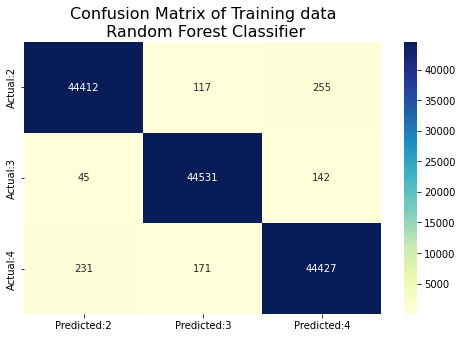

In [115]:
print_matrix_plot_confusion_matrix(rscv_rfc.best_estimator_, X_train, y_train,
                                   "Confusion Matrix of Training data\n Random Forest Classifier", "Training")

Testing Accuracy: 0.7811816192560175
Precision, Recall and f1-scores
              precision    recall  f1-score   support

           2       0.84      0.79      0.82       907
           3       0.76      0.81      0.78       973
           4       0.74      0.74      0.74       862

    accuracy                           0.78      2742
   macro avg       0.78      0.78      0.78      2742
weighted avg       0.78      0.78      0.78      2742



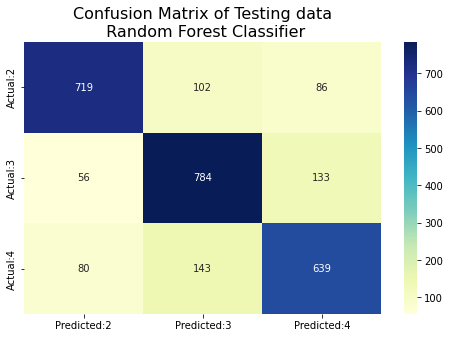

In [127]:
print_matrix_plot_confusion_matrix(rscv_rfc.best_estimator_, X_test, y_test,
                                   "Confusion Matrix of Testing data\n Random Forest Classifier", "Testing")

## Ada Boost Classifier

In [120]:
ada_boost_classifier = AdaBoostClassifier()
grid = {'n_estimators': np.arange(40, 100, 1),
        'algorithm': ['SAMME', 'SAMME.R']}
rscv_abc = RandomizedSearchCV(ada_boost_classifier, grid, n_iter=50, cv=5, n_jobs=8, scoring='f1_weighted')
rscv_abc.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(), n_iter=50, n_jobs=8,
                   param_distributions={'algorithm': ['SAMME', 'SAMME.R'],
                                        'n_estimators': array([40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56,
       57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73,
       74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90,
       91, 92, 93, 94, 95, 96, 97, 98, 99])},
                   scoring='f1_weighted')

In [121]:
print_things_about_estimators(rscv_abc)

Optimal parameters: AdaBoostClassifier(n_estimators=83)
Best score: 0.6120104106813583
Number of splits: 5


Training Accuracy: 0.619134823681801
Precision, Recall and f1-scores
              precision    recall  f1-score   support

           2       0.70      0.75      0.72     44784
           3       0.60      0.68      0.64     44718
           4       0.54      0.43      0.48     44829

    accuracy                           0.62    134331
   macro avg       0.61      0.62      0.61    134331
weighted avg       0.61      0.62      0.61    134331



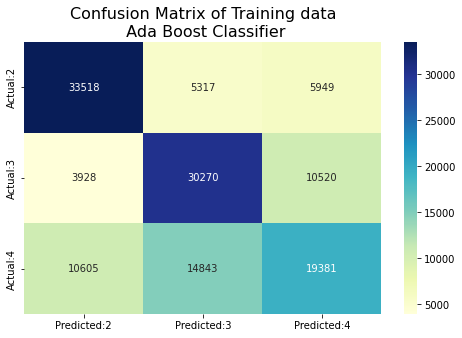

In [128]:
print_matrix_plot_confusion_matrix(rscv_abc.best_estimator_, X_train, y_train,
                                   "Confusion Matrix of Training data\n Ada Boost Classifier", "Training")

Testing Accuracy: 0.6199854121079504
Precision, Recall and f1-scores
              precision    recall  f1-score   support

           2       0.70      0.73      0.71       907
           3       0.62      0.67      0.64       973
           4       0.52      0.45      0.48       862

    accuracy                           0.62      2742
   macro avg       0.61      0.62      0.61      2742
weighted avg       0.61      0.62      0.62      2742



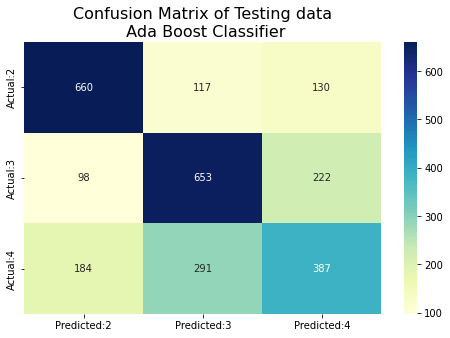

In [129]:
print_matrix_plot_confusion_matrix(rscv_abc.best_estimator_, X_test, y_test,
                                   "Confusion Matrix of Testing data\n Ada Boost Classifier", "Testing")

## Gradient Boosting Classifier

In [ ]:
gradient_boost_classifier = GradientBoostingClassifier()
grid = {'n_estimators': np.arange(70, 120, 1),
        'max_depth': np.arange(2, 20, 1),
#         'loss': ['deviance', 'exponential'],
        'max_features': ['sqrt', 'log2']}
rscv_gbc = RandomizedSearchCV(gradient_boost_classifier, grid, n_iter=50, cv=5, n_jobs=8, scoring='f1_weighted')
rscv_gbc.fit(X_train, y_train)

In [64]:
print_things_about_estimators(rscv_gbc)

Optimal parameters: GradientBoostingClassifier(max_features='sqrt')
Best score: 0.6518790306850786
Number of splits: 5


Training Accuracy: 0.6603017918425382
Precision, Recall and f1-scores
              precision    recall  f1-score   support

           2       0.71      0.81      0.76     44784
           3       0.64      0.70      0.67     44718
           4       0.61      0.48      0.54     44829

    accuracy                           0.66    134331
   macro avg       0.65      0.66      0.65    134331
weighted avg       0.65      0.66      0.65    134331



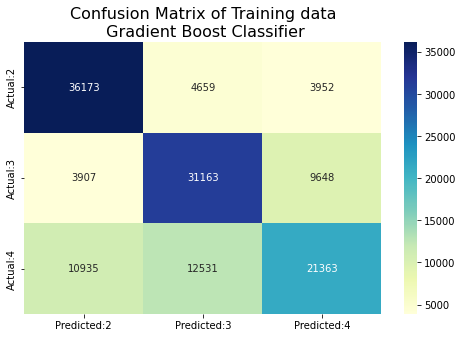

In [65]:
print_matrix_plot_confusion_matrix(rscv_gbc.best_estimator_, X_train, y_train,
                                   "Confusion Matrix of Training data\n Gradient Boost Classifier", "Training")

Testing Accuracy: 0.6564551422319475
Precision, Recall and f1-scores
              precision    recall  f1-score   support

           2       0.71      0.80      0.75       907
           3       0.66      0.70      0.68       973
           4       0.58      0.46      0.51       862

    accuracy                           0.66      2742
   macro avg       0.65      0.65      0.65      2742
weighted avg       0.65      0.66      0.65      2742



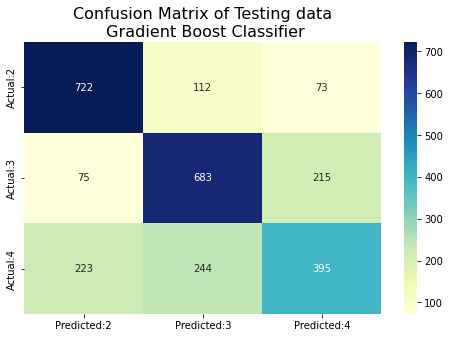

In [66]:
print_matrix_plot_confusion_matrix(rscv_gbc.best_estimator_, X_test, y_test,
                                   "Confusion Matrix of Testing data\n Gradient Boost Classifier", "Testing")

## Support Vector Classifier

In [ ]:
svc = SVC()
svc.fit(X_train, y_train)

In [ ]:
print_matrix_plot_confusion_matrix(svc, X_train, y_train,
                                   "Confusion Matrix of Training data\n Support Vector Classifier", "Training")

In [ ]:
print_matrix_plot_confusion_matrix(svc, X_test, y_test,
                                   "Confusion Matrix of Testing data\n Support Vector Classifier", "Testing")

## Logistic regression

In [44]:
lr = LogisticRegression(multi_class='multinomial')
lr.fit(X_train, y_train)

C:\Users\Dell\anaconda3\envs\usa-accidents-severity-predictions\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

Training Accuracy: 0.5259843223083279
Precision, Recall and f1-scores
              precision    recall  f1-score   support

           2       0.58      0.65      0.62     44784
           3       0.51      0.61      0.56     44718
           4       0.45      0.31      0.37     44829

    accuracy                           0.53    134331
   macro avg       0.52      0.53      0.51    134331
weighted avg       0.52      0.53      0.51    134331



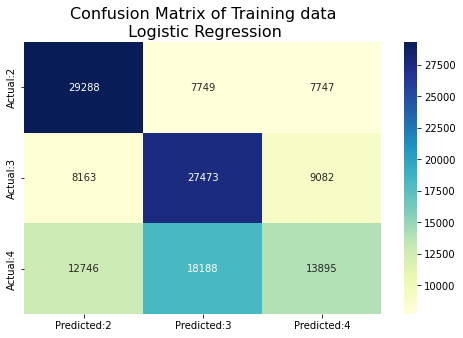

In [45]:
print_matrix_plot_confusion_matrix(lr, X_train, y_train,
                                   "Confusion Matrix of Training data\n Logistic Regression", "Training")

Testing Accuracy: 0.5448577680525164
Precision, Recall and f1-scores
              precision    recall  f1-score   support

           2       0.59      0.67      0.63       907
           3       0.55      0.64      0.59       973
           4       0.45      0.31      0.37       862

    accuracy                           0.54      2742
   macro avg       0.53      0.54      0.53      2742
weighted avg       0.53      0.54      0.53      2742



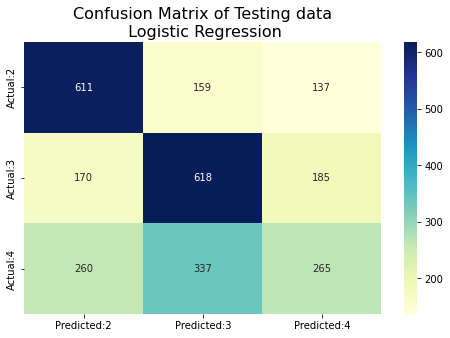

In [47]:
print_matrix_plot_confusion_matrix(lr, X_test, y_test,
                                   "Confusion Matrix of Testing data\n Logistic Regression", "Testing")

## Neural Networks

In [53]:
nn = MLPClassifier(hidden_layer_sizes=(256, 128, 64,32,16))
nn.fit(X_train, y_train)

C:\Users\Dell\anaconda3\envs\usa-accidents-severity-predictions\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(256, 128, 64, 32, 16))

Training Accuracy: 0.6580982796227229
Precision, Recall and f1-scores
              precision    recall  f1-score   support

           2       0.73      0.73      0.73     44784
           3       0.65      0.70      0.67     44718
           4       0.59      0.55      0.57     44829

    accuracy                           0.66    134331
   macro avg       0.66      0.66      0.66    134331
weighted avg       0.66      0.66      0.66    134331



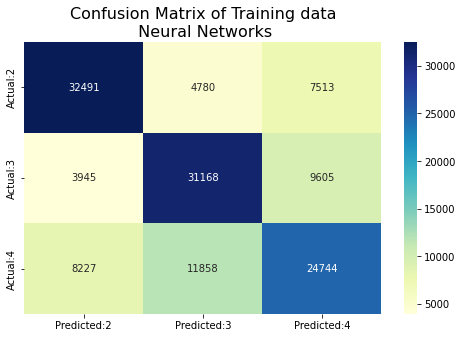

In [54]:
print_matrix_plot_confusion_matrix(nn, X_train, y_train,
                                   "Confusion Matrix of Training data\n Neural Networks", "Training")

Testing Accuracy: 0.6564551422319475
Precision, Recall and f1-scores
              precision    recall  f1-score   support

           2       0.74      0.72      0.73       907
           3       0.65      0.71      0.68       973
           4       0.57      0.53      0.55       862

    accuracy                           0.66      2742
   macro avg       0.65      0.65      0.65      2742
weighted avg       0.66      0.66      0.66      2742



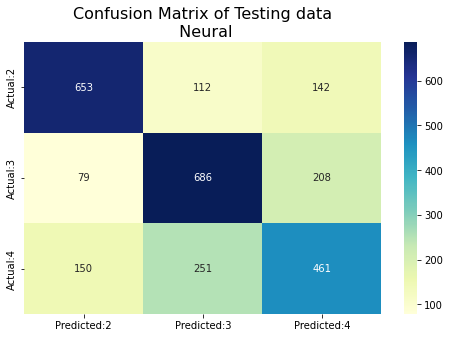

In [55]:
print_matrix_plot_confusion_matrix(nn, X_test, y_test,
                                   "Confusion Matrix of Testing data\n Neural Networks", "Testing")

## XGBoost

In [59]:
xgb_model = xgb.XGBClassifier(objective="multi:softprob", random_state=42)
xgb_model.fit(X_train, y_train)

C:\Users\Dell\anaconda3\envs\usa-accidents-severity-predictions\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:09:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

Training Accuracy: 0.767879342817369
Precision, Recall and f1-scores
              precision    recall  f1-score   support

           2       0.82      0.82      0.82     44784
           3       0.73      0.81      0.77     44718
           4       0.76      0.67      0.71     44829

    accuracy                           0.77    134331
   macro avg       0.77      0.77      0.77    134331
weighted avg       0.77      0.77      0.77    134331



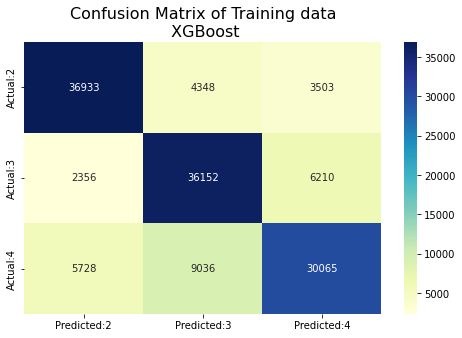

In [60]:
print_matrix_plot_confusion_matrix(xgb_model, X_train, y_train,
                                   "Confusion Matrix of Training data\n XGBoost", "Training")

Testing Accuracy: 0.7417943107221007
Precision, Recall and f1-scores
              precision    recall  f1-score   support

           2       0.81      0.80      0.80       907
           3       0.72      0.78      0.75       973
           4       0.70      0.63      0.67       862

    accuracy                           0.74      2742
   macro avg       0.74      0.74      0.74      2742
weighted avg       0.74      0.74      0.74      2742



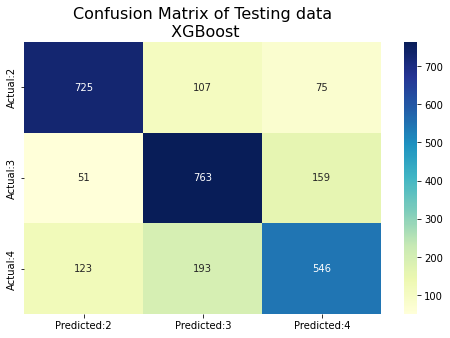

In [61]:
print_matrix_plot_confusion_matrix(xgb_model, X_test, y_test,
                                   "Confusion Matrix of Testing data\n XGBoost", "Testing")

In [48]:
importances = pd.DataFrame(np.zeros((X_train.shape[1], 1)), columns=['importance'], index=balanced_data.drop('Severity',axis=1).columns)

importances.iloc[:,0] = clf_rf.best_estimator_.feature_importances_

importances.sort_values(by='importance', inplace=True, ascending=False)
importances30 = importances.head(30)

plt.figure(figsize=(15, 10))
sns.barplot(x='importance', y=importances30.index, data=importances30)

plt.xlabel('')
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
plt.title('Random Forest Classifier Feature Importance', size=15)

plt.show()

NameError: name 'clf_rf' is not defined